In [1]:
%config InlineBackend.figure_format = 'retina'

In [2]:
import os
import math
import pickle
import numpy as np
import scanpy as sc
from glob import glob
import pandas as pd
from copy import deepcopy
import matplotlib.pyplot as plt
from pylab import *
from matplotlib import pyplot
from matplotlib_venn import venn2,venn2_circles
from brokenaxes import brokenaxes
import seaborn as sns
from adjustText import adjust_text

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams["font.sans-serif"] = "Arial"

In [6]:
indir = '~/decidua/10xVisium/file/new/seurat'

In [7]:
slices = ['A1_N59','B1_N59','C1_N56','D1_N56','C1_N65','D1_N65',
          'B1_P4','C1_P8B','D1_P9T','D1_P9B']

In [8]:
slide_domain_marker_dict = {}
for slide in slices:
    slide_marker_df = pd.read_csv(indir+'/'+slide+'.domain_marker.csv', index_col=0)
    slide_marker_df = slide_marker_df[(slide_marker_df['avg_log2FC']>=0.25) & (slide_marker_df['p_val']<0.01)]
    
    for domain in ['Domain1','Domain2']:
        slide_domain_marker_dict[domain+'-'+slide] = slide_marker_df[(slide_marker_df['cluster']==domain)]['gene'].tolist()

In [9]:
items = list(slide_domain_marker_dict.keys())
jaccard_index_df = pd.DataFrame(index=items, columns=items)

for a_domain in items:
    a_markers = slide_domain_marker_dict[a_domain]
    for b_domain in items:
        b_markers = slide_domain_marker_dict[b_domain]
        
        nb_overlap = len(set(a_markers).intersection(set(b_markers)))
        nb_all = len(set(a_markers+b_markers))
        
        jaccard_index_df.loc[a_domain, b_domain] = nb_overlap / nb_all
jaccard_index_df = jaccard_index_df.applymap(float)

In [12]:
color_df = pd.DataFrame(index=jaccard_index_df.index)
color_df['Domain'] = color_df.index.map(lambda x: '#f37423' if re.match('Domain1',x) else '#089386')
color_df['State'] = color_df.index.map(lambda x: '#6299c5' if re.search('_N',x) else '#cc453a')

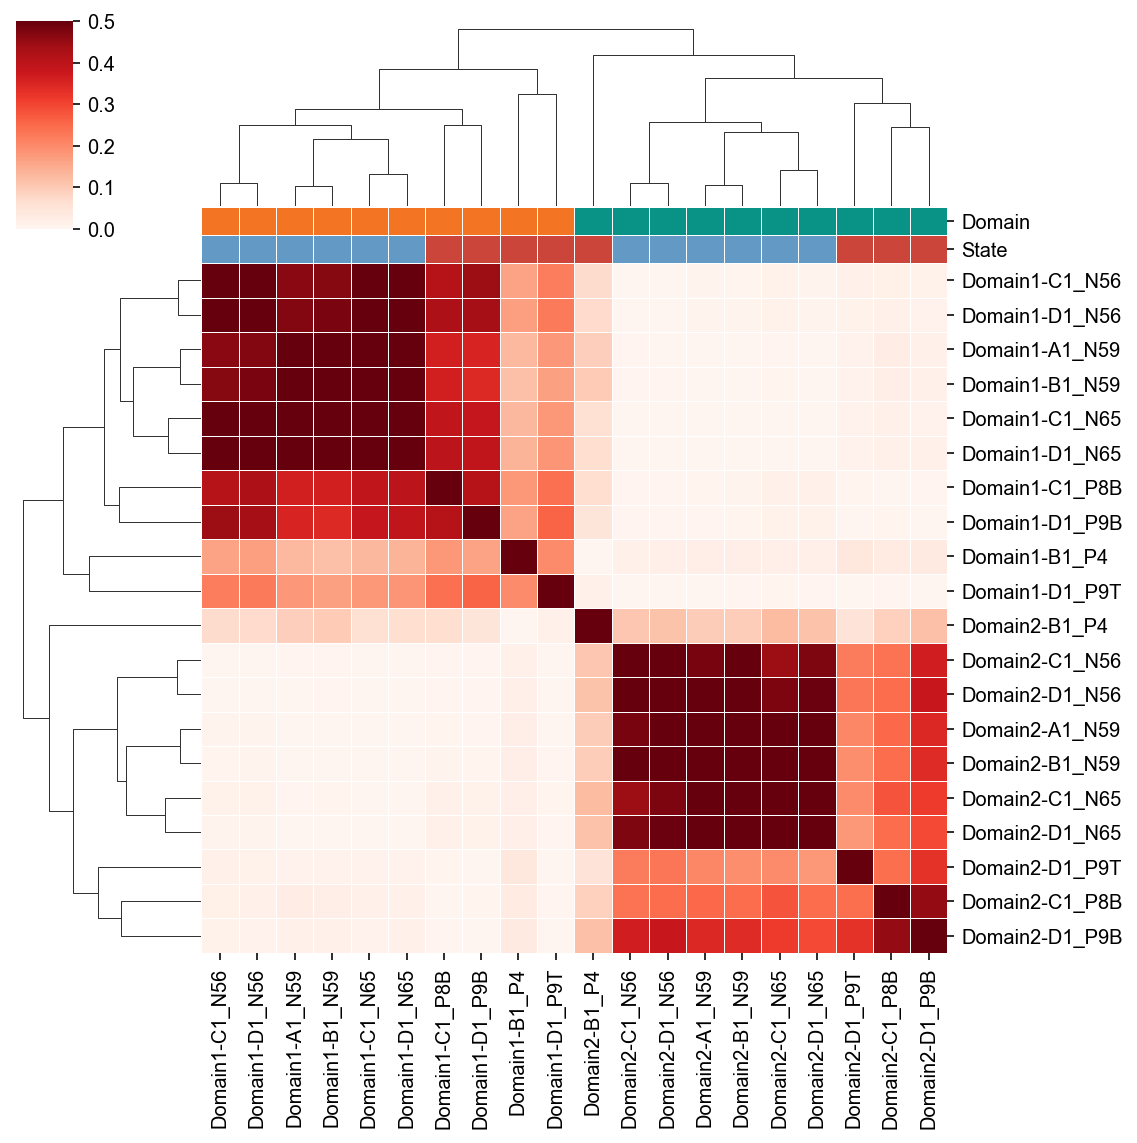

In [13]:
sns.clustermap(jaccard_index_df, method='weighted', cmap='Reds', figsize=(8,8), 
               vmin=0, vmax=.5, linewidth=.5, col_colors=color_df)